In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Data Visualization and Preprocessing:

In [2]:
# Load Data
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()

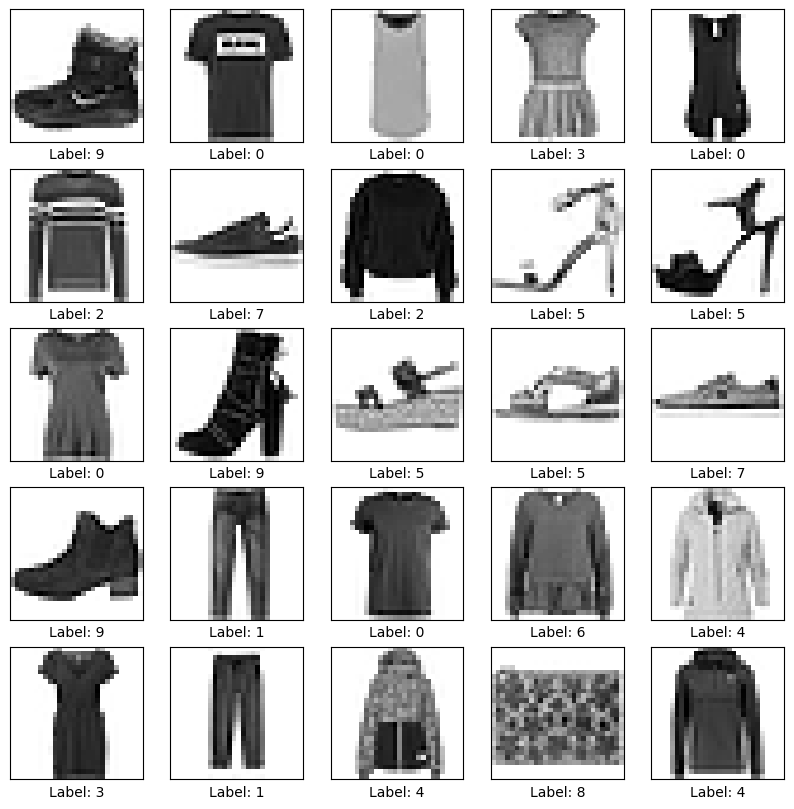

In [6]:
# Visualize the distribution of different fashion items in the dataset to understand the data better

plt.figure(figsize = (10,10))
for i in range(25):         # Visualizing the first 25 images from fashon_mnist dataset
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(f'Label: {y_train[i]}')
plt.show()    

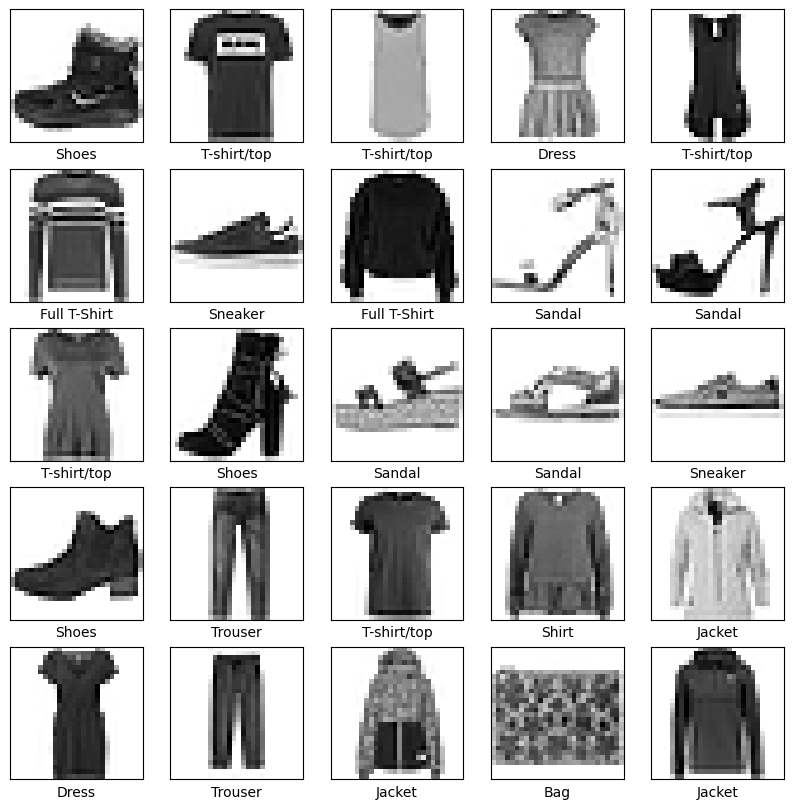

In [8]:
# Define class names    (JUST FOR REFERENCE)
class_names = ['T-shirt/top', 'Trouser', 'Full T-Shirt', 'Dress', 'Jacket', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Shoes']

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [10]:
# Normalize the image pixel values for effective model training.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [11]:
# Convert the categorical labels into a one-hot encoded format to suit the neural network’s output layer.
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
## data Agumentataion
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Model Architecture and Development:

In [17]:
# Design a fully connected neural network with appropriate input, hidden, and output layers.

def create_model():
    model = models.Sequential([layers.Input(shape = (28,28,1)),
                              data_augmentation,
                               ## First Layer with 32 Neurons
                              layers.Conv2D(32, (3,3), activation = 'relu'),
                              layers.BatchNormalization(),
                              layers.MaxPool2D((2,2)),
                               ## Second Layer with 64 Neurons
                              layers.Conv2D(64, (3,3), activation = 'relu'),
                              layers.BatchNormalization(),
                              layers.MaxPool2D((2,2)),
                               ## Flatten
                              layers.Flatten(),
                               ## Dense Layer with 128 Neurons
                              layers.Dense(128, activation = 'relu'),
                               ## Output Layer with 10 neurons (for the 10 categories)
                              layers.Dense(10, activation='softmax')])
    
    return model

In [18]:
# Ensure the model is complex enough to capture the underlying patterns in the data without overfitting.
##Create Model
model = create_model()
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
## Callbacks
early_stopping = callbacks.EarlyStopping(patience =5)
reduce_lr = callbacks.ReduceLROnPlateau(factor = 0.5, patience=3)

# Model Training

In [21]:
# Train the model on the preprocessed training data, using categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and accuracy as the evaluation metric.
# Model Train
history = model.fit(x_train, y_train, epochs=30, batch_size = 35, validation_split = 0.2, callbacks=[early_stopping, reduce_lr] )

Epoch 1/30
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.7115 - loss: 0.7934 - val_accuracy: 0.7972 - val_loss: 0.5582 - learning_rate: 0.0100
Epoch 2/30
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.8165 - loss: 0.5003 - val_accuracy: 0.8188 - val_loss: 0.4807 - learning_rate: 0.0100
Epoch 3/30
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.8401 - loss: 0.4439 - val_accuracy: 0.8286 - val_loss: 0.4629 - learning_rate: 0.0100
Epoch 4/30
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.8473 - loss: 0.4111 - val_accuracy: 0.8117 - val_loss: 0.5036 - learning_rate: 0.0100
Epoch 5/30
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.8592 - loss: 0.3853 - val_accuracy: 0.7767 - val_loss: 0.7898 - learning_rate: 0.0100
Epoch 6/30
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.8636 - loss: 0.3710 - val_accuracy: 0.8233 - val_loss: 0.4609 - learning_rate: 0.0100
Epoch 7/30
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accura

# Performance Evaluation:

In [22]:
# Assess the model’s performance using both training and validation datasets.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test_Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8524 - loss: 0.3974
Test_Accuracy: 0.8540999889373779


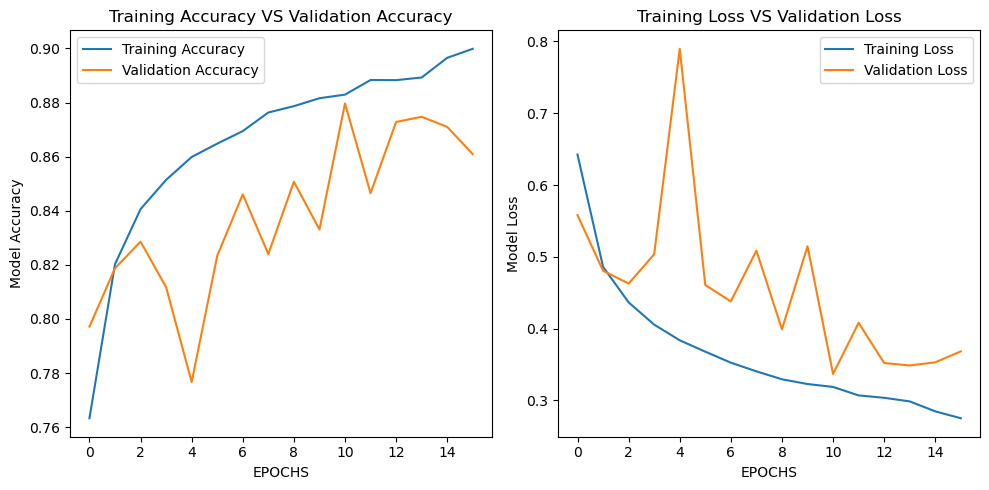

In [25]:
# Visualize the training and validation loss and accuracy to identify any signs of overfitting or underfitting.
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training Accuracy VS Validation Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training Loss VS Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('Model Loss')
plt.legend()
plt.tight_layout()
plt.show()